# 9장. 비지도 학습

https://nbviewer.jupyter.org/github/rickiepark/handson-ml2/tree/master/


이 코드의 내용은 Hands-On Machine Learning with Scikit-Learn & TensorFlow을 참고했음을 밝힙니다.

* 군집(clustering): 비슷한 샘플을 클러스터(cluster)로 모읍니다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있는 훌륭한 도구입니다.
* 이상치 탐지(outlier detection): '정상' 데이터가 어떻게 보이는지를 학습합니다. 그다음 비정상 샘플을 감지하는 데 사용합니다. 예를 들면 제조 라인에서 결함 제품을 감지하거나 시계열 데이터에서 새로운 트렌드를 찾습니다.
* 밀도 추정(density estimation): 데이터셋 생성 확률 과정(random process)의 확률 밀도 함수(probaility density function, PDF)를 추정합니다. 밀도 추정은 이상치 탐지에 널리 사용됩니다. 밀돋가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높습니다. 또한 데이터 분석과 시각화에도 유용합니다.

# 군집

비슷한 샘플을 구별해 하나의 클러스터(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 작업

### 군집을 적용하는 다양한 애플리케이션

* 고객 분류<br>
고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있습니다. 이는 고객이 누구인지, 고객이 무엇을 원하는지 이해하는 데 도움이 됩니다. 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있습니다. 예를 들어 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템(recommender system)을 만들 수 있습니다.<br>
<br>

* 데이터 분석<br>
새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 됩니다.<br>
<br>

* 차원 축소 기법<br>
한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성(affinity)을 측정할 수 있습니다(친화성은 샘플이 클러스터에 얼마나 잘 맞는지를 측정합니다). 각 샘플의 특성 벡터 x는 클러스터 친화성의 벡터로 바꿀 수 있습니다. k개의 클러스터가 있다면 이 벡터는 k차원이 됩니다. 이 벡터는 일반적으로 원본 특성 벡터보다 훨씬 저차원입니다. 하지만 이후 분석을 위한 충분한 정보를 가질 수 있습니다.<br>
<br>

* 이상치 탐지<br>
모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높습니다. 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만들었다면 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지할 수 있습니다. 이상치 탐지는 특히 제조 분야에서 결함을 감지할 때 유용합니다. 또는 부정 거래 감지(fraud detection)에 활용됩니다.<br>
<br>

* 준지도 학습<br>
레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있습니다. 이 기법은 이어지는 지도 학습 알고리즘에 필요한 레이블이 크게 증가해 성능을 크게 향상시킵니다.<br>
<br>

* 검색 엔진<br>
일부 검색 엔진은 제시된 이미지와 비슷한 이미지를 찾아줍니다. 이런 시스템을 구축하려면 먼저 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야 합니다. 비슷한 이미지는 동일한 클러스터에 속합니다. 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾습니다. 그다음 이 클러스터의 모든 이미지를 반환합니다.<br>
<br>

* 이미지 분할<br>
색을 기반으로 픽셀을 클러스터로 모읍니다. 그다음 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꿉니다. 이는 이미지에 있는 색상의 종류를 크게 줄입니다. 이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 이미지 분할을 많이 활용합니다.


### 1. k-평균

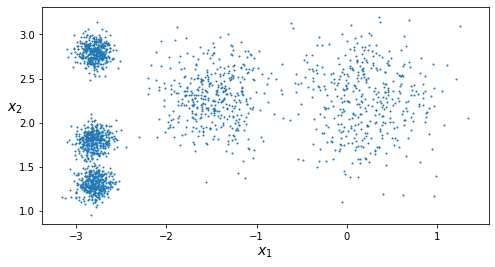

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
# save_fig("blobs_plot")
plt.show()   

In [4]:
# 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당합니다.

from sklearn.cluster import KMeans

k = 5   # 클러스터의 개수
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [5]:
# 군집에서 각 샘플의 레이블(label)은 알고리즘이 샘플에 할당한 클러스터의 인덱스입니다.

y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [6]:
# KMeans 클래스의 인스턴스는 lables_ 인스턴스 변수에 훈련된 샘플의 레이블을 가지고 있습니다.

y_pred is kmeans.labels_

True

In [7]:
# 이 알고리즘이 찾은 센트로이드 다섯 개도 확인할 수 있습니다.

kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [8]:
# 새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있습니다.

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

<img src='https://i.imgur.com/GPIaPu0.png' width='100%'>

클러스터의 결정 경계를 그려보면 보로노이 다이어그램(Voronoi tessellation)을 얻을 수 있습니다.

k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않습니다. 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문입니다.

* 하드 군집(hard clustering): 샘플을 하나의 클러스터에 할당
* 소프트 군집(soft clustering): 샘플에 점수(예를 들어 샘플과 센트로이드 사이의 거리, 가우시안 방사 기저 함수와 같은 유사도 점수(similarity score, 또는 친화성 점수))를 부여

In [9]:
# 샘플과 각 센트로이드 사이의 거리를 반환
# X_new에 있는 첫 번째 샘플은 첫 번째 row에 해당하며, 각 column은 각 센트로이드를 의미한다.
# 매우 효율적인 비선형 차원 축소 기법

kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

K-평균 알고리즘~